In [ ]:
!pip install chardet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import chardet

In [ ]:
# prompt: code to upload files

from google.colab import files

# Upload the file to Google Drive
files.upload()

# Or, upload files to Google Cloud Storage
!gsutil cp /content/ToyotaCorolla.csv gs://your-bucket-name/ToyotaCorolla.csv


Saving utf-8-toyots.csv to utf-8-toyots (1).csv
ServiceException: 401 Anonymous caller does not have storage.objects.list access to the Google Cloud Storage bucket. Permission 'storage.objects.list' denied on resource (or it may not exist).


In [ ]:
data = pd.read_csv('utf-8-toyots.csv')

In [ ]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [ ]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
data.shape

(1436, 38)

In [ ]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [ ]:
data_sort = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [ ]:
data_sort

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
x = data_sort[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
y = data_sort['Price']

In [ ]:
# we will need sactter matrix , correlation matrix
## pairplot, pdlplotting.scatter_matrix

In [ ]:
## we are going to check the is there any null values we can interprete by the info() code but we are conferming here
data.isna().sum()   # sum of rcalculating the how many null values are there in the one column
## in this there are no null values

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [ ]:
## correlation matrix
## find correlation with dependent 'column''price'
data_sort.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [ ]:
## correlation matrix
## find correlation with independent 'columns'.
x.corr()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Age_08_04,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


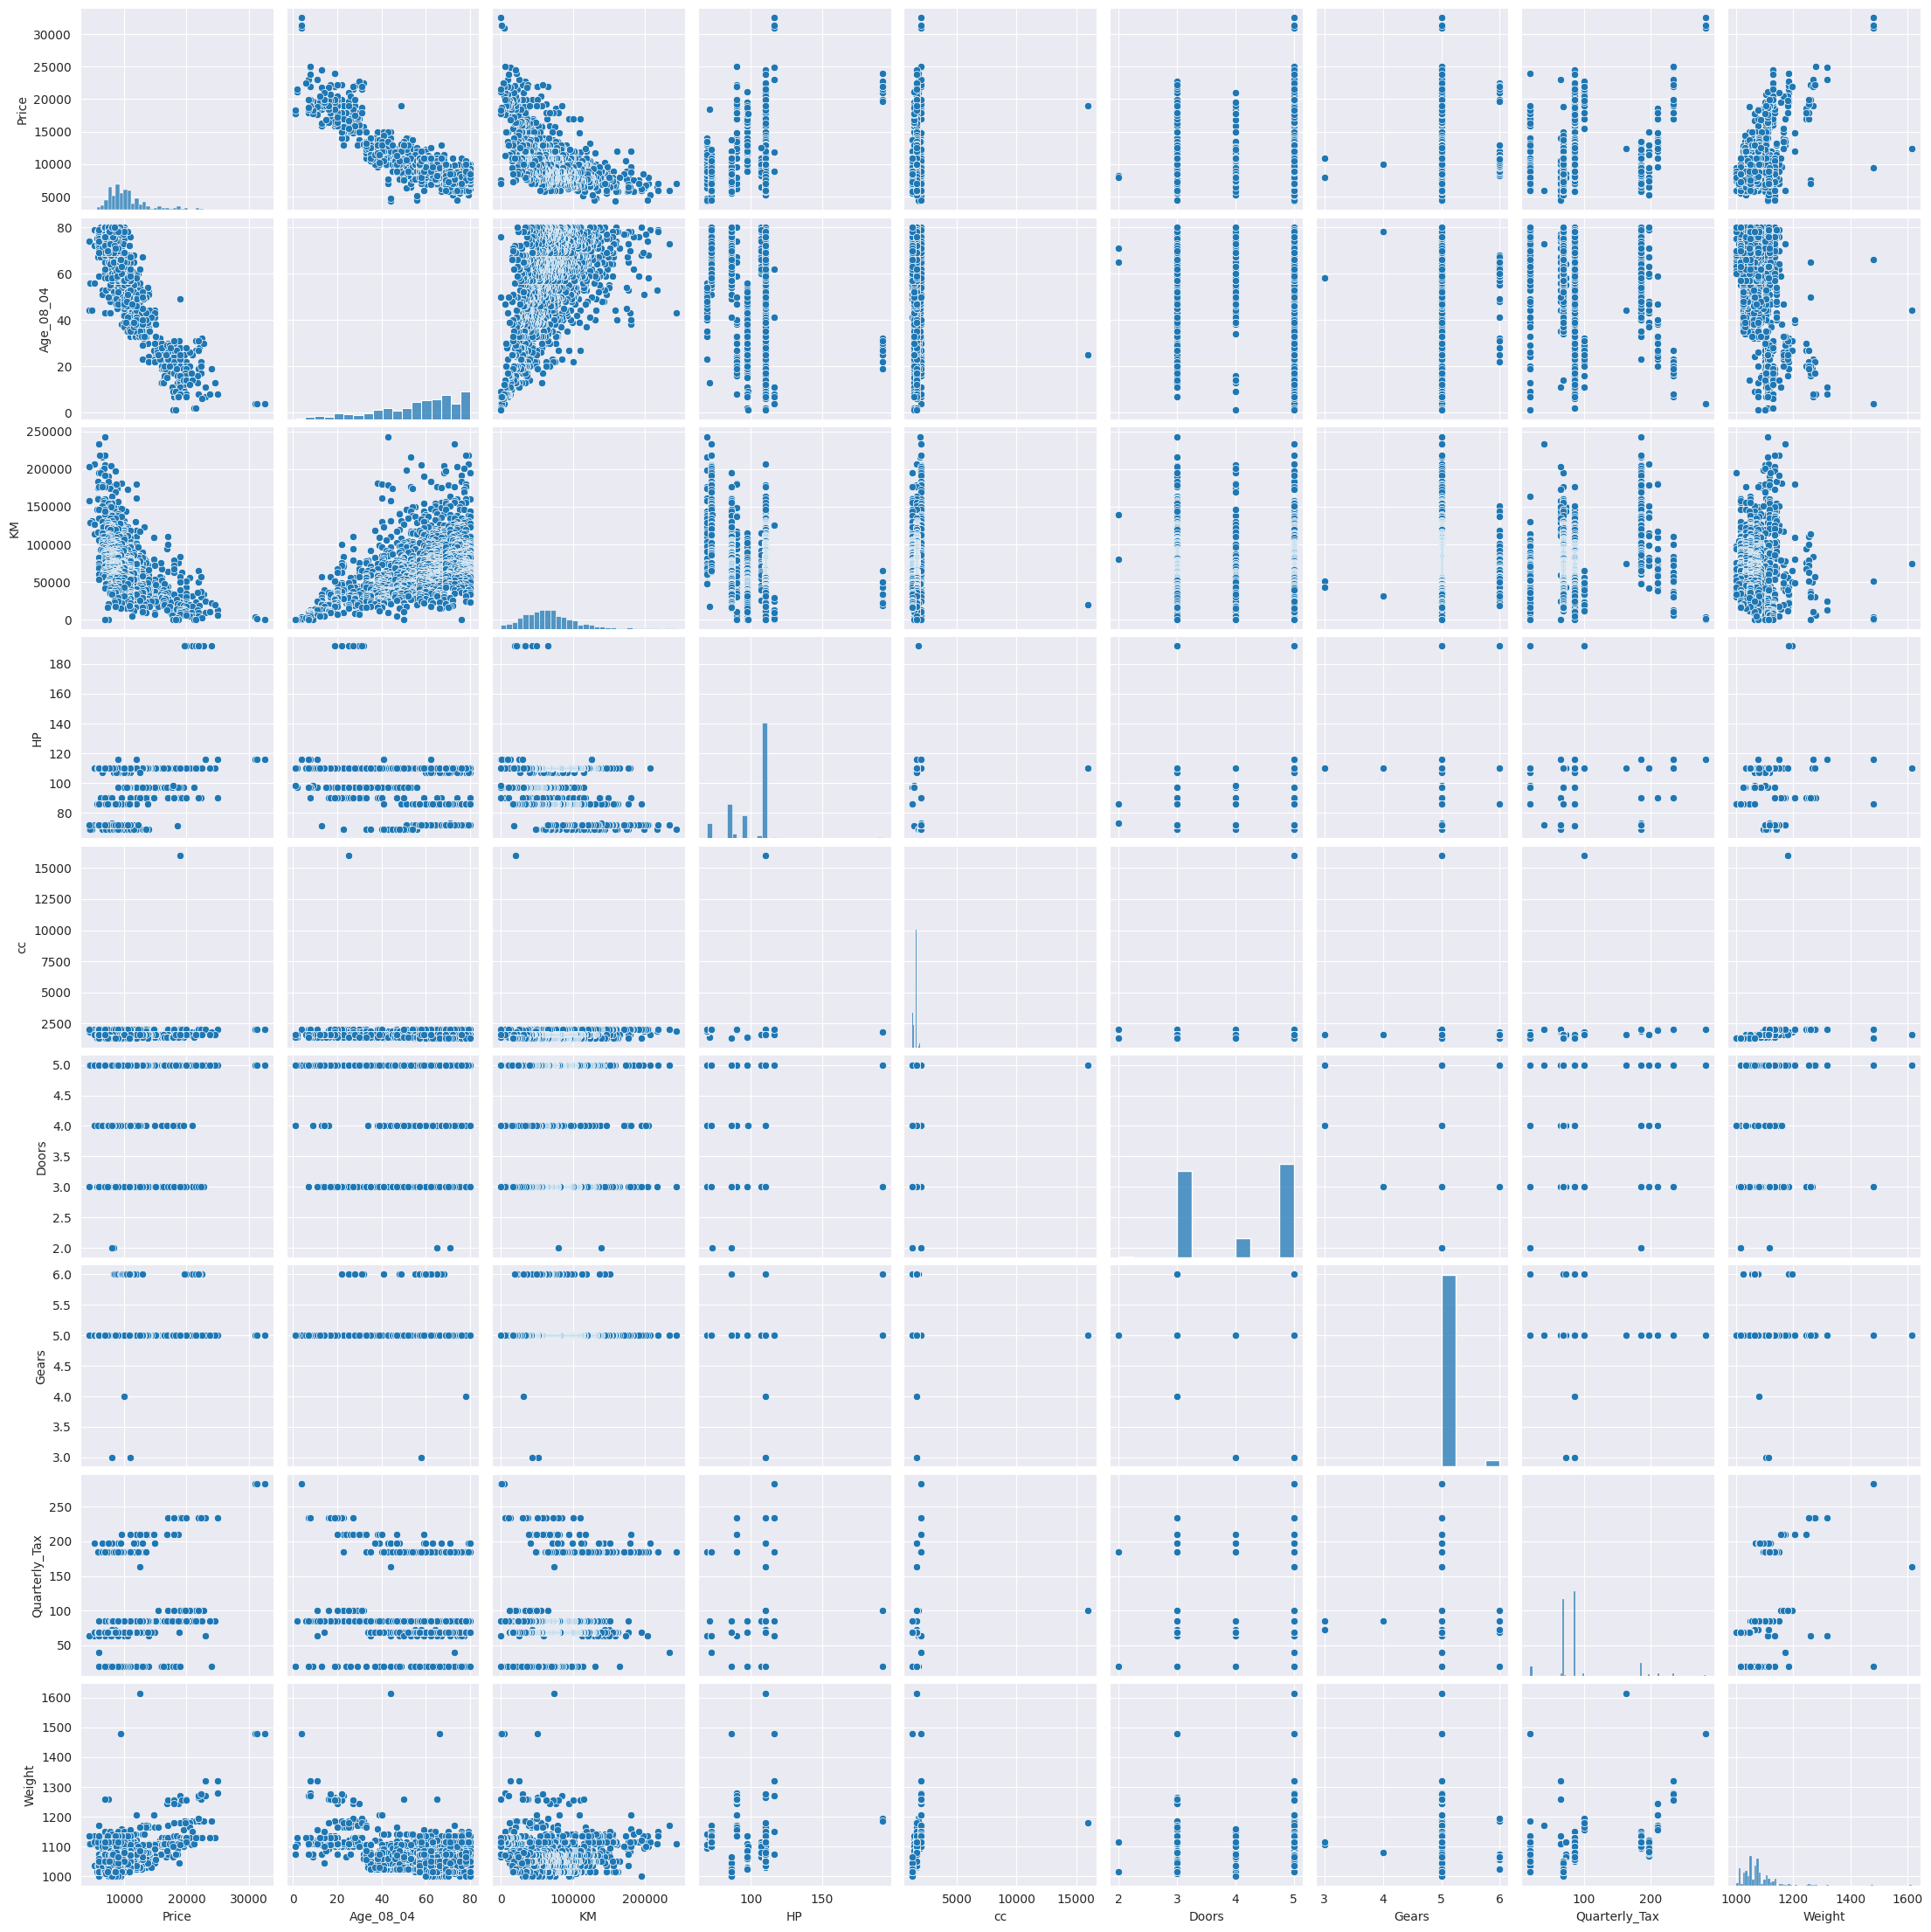

In [ ]:
## we will visulize the data

# scatter plot
sns.set_style(style='darkgrid')
sns.pairplot(data_sort)


<Axes: xlabel='Weight', ylabel='Quarterly_Tax'>

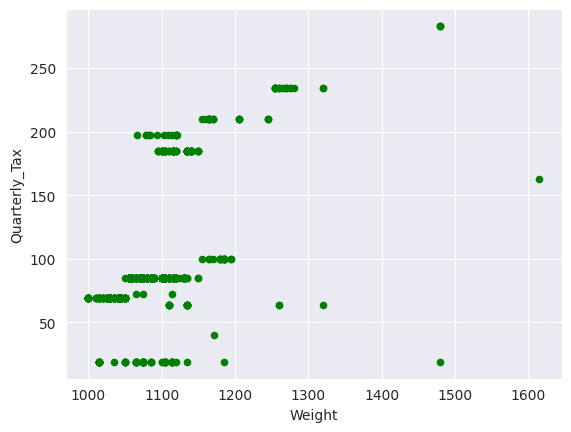

In [ ]:
## i have seen high corealtion between weight and quartile tax
## i am plotting the scatter plot for further analyze the data
data_sort.plot.scatter(x = 'Weight', y = 'Quarterly_Tax', c = 'green')

<Axes: xlabel='Weight', ylabel='Price'>

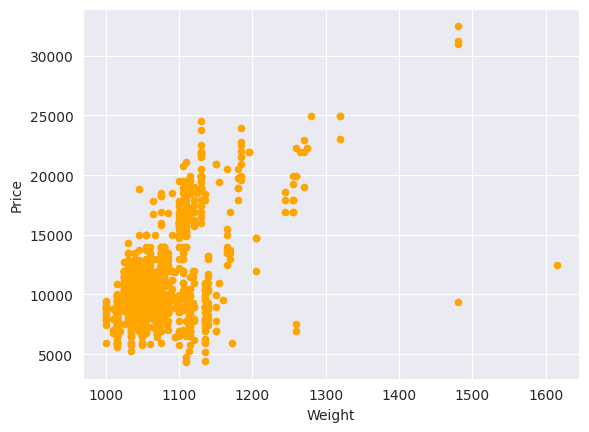

In [ ]:
## i have seen high corealtion between weight and price
## i am plotting the scatter plot for further analyze the data
data_sort.plot.scatter(x = 'Weight', y = 'Price', c = 'orange')
## there are so many outliers are there
## yeah we can see increasing trend by the values

In [ ]:
## prepare the model building
## ols(ordinery least method)
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=data_sort).fit()
##  excess variables can be joined using + symbol

In [ ]:
## coefficients beta values
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [ ]:
## t-values and p-values: print(model.tvalues), (model.p-values)
print("**** t_values ****",'\n',model.tvalues, '\n', '****p-values****','\n', model.pvalues)
## p-values of gears and quartile-tax are same
## if the values are greater than 0.05(alpha) then they are not significant
## in this case 'cc' and 'gear' these two wre greater than alpha values other values are significant with the

**** t_values **** 
 Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 ****p-values**** 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [ ]:
## r square value of model
(model.rsquared,model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

In [ ]:
### simple regresssion model models
## we have to check individual p-values b/w the dependent and indepandent columns
sml_Age_08_04 = smf.ols('Price~Age_08_04', data = data_sort).fit()
print(sml_Age_08_04.tvalues, '\n', sml_Age_08_04.pvalues)

Intercept    138.907847
Age_08_04    -68.978267
dtype: float64 
 Intercept    0.0
Age_08_04    0.0
dtype: float64


These values are the results of a simple linear regression model. Let's break them down:

1. **Intercept and Age_08_04 (Coefficients)**: These are the coefficients of your regression model. The Intercept (β0) is 138.907847, which is the expected mean value of 'price' when all 'age_08_04' values are 0. The coefficient for 'age_08_04' (β1) is -68.978267, which means that for each one-unit increase in 'age_08_04', the expected decrease in 'price' is approximately 68.978267 units, holding all other predictors in the model constant.

2. **P-values**: The second part of your output seems to be the p-values for the coefficients. Both are 0, suggesting that the intercept and the 'age_08_04' variable are statistically significant predictors of 'price' at the 0.05 significance level. A p-value of 0.0 indicates that the corresponding predictor variable is statistically significant at the 5% level, and it has a meaningful contribution to your response variable in your linear model.

Remember, these interpretations are made under the assumption that the necessary assumptions for the linear regression model are satisfied. These include linearity, independence, homoscedasticity (equal variances), and normality of residuals. If these assumptions are violated, the model's estimates and predictions may not be reliable. It's always a good practice to check these assumptions when interpreting the model.

In [ ]:
### simple regresssion model models
## we have to check individual p-values b/w the dependent and indepandent columns
sml_km = smf.ols('Price~KM', data = data_sort).fit()
print(sml_km.tvalues, '\n', sml_km.pvalues)

Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


In [ ]:
sml_HP = smf.ols('Price~HP', data = data_sort).fit()
print(sml_HP.tvalues, '\n', sml_HP.pvalues)

Intercept     4.803134
HP           12.567862
dtype: float64 
 Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64


In [ ]:
sml_cc = smf.ols('Price~cc', data = data_sort).fit()
print(sml_cc.tvalues, '\n', sml_cc.pvalues)

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [ ]:
sml_Doors = smf.ols('Price~Doors', data = data_sort).fit()
print(sml_Doors.tvalues, '\n', sml_Doors.pvalues)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [ ]:
sml_Gears = smf.ols('Price~Gears', data = data_sort).fit()
print(sml_Gears.tvalues, '\n', sml_Gears.pvalues)

Intercept    1.814534
Gears        2.394401
dtype: float64 
 Intercept    0.069804
Gears        0.016775
dtype: float64


In [ ]:
sml_Quarterly_Tax = smf.ols('Price~Quarterly_Tax', data = data_sort).fit()
print(sml_Quarterly_Tax.tvalues, '\n', sml_Quarterly_Tax.pvalues)

Intercept        41.330311
Quarterly_Tax     8.507487
dtype: float64 
 Intercept        1.532168e-246
Quarterly_Tax     4.407393e-17
dtype: float64


In [ ]:
sml_Weight = smf.ols('Price~Weight', data = data_sort).fit()
print(sml_Weight.tvalues, '\n', sml_Weight.pvalues)

Intercept   -20.263590
Weight       27.045855
dtype: float64 
 Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64


CALCULATE **VIF**

In [ ]:
rsq_price = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=data_sort).fit().rsquared
rsq_price = 1/(1-rsq_price)

rsq_Age_08_04 = smf.ols('Age_08_04~Price+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=data_sort).fit().rsquared
rsq_Age_08_04 = 1/(1-rsq_Age_08_04)

rsq_KM = smf.ols('KM~Price+HP+cc+Doors+Gears+Quarterly_Tax+Weight+Age_08_04', data=data_sort).fit().rsquared
rsq_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Price+KM+cc+Doors+Gears+Quarterly_Tax+Weight+Age_08_04', data=data_sort).fit().rsquared
rsq_HP = 1/(1-rsq_HP)


rsq_cc = smf.ols('cc~Price+KM+HP+Doors+Gears+Quarterly_Tax+Weight+Age_08_04', data=data_sort).fit().rsquared
rsq_cc = 1/(1-rsq_cc)


rsq_Doors = smf.ols('Doors~Price+KM+HP+cc+Gears+Quarterly_Tax+Weight+Age_08_04', data=data_sort).fit().rsquared
rsq_Doors = 1/(1-rsq_Doors)


rsq_Gears = smf.ols('Gears~Price+KM+HP+cc+Doors+Quarterly_Tax+Weight+Age_08_04', data=data_sort).fit().rsquared
rsq_Gears = 1/(1-rsq_Gears)


rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~Price+KM+HP+cc+Doors+Gears+Weight+Age_08_04', data=data_sort).fit().rsquared
rsq_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax)



rsq_Weight = smf.ols('Weight~Price+KM+HP+cc+Doors+Gears+Quarterly_Tax+Age_08_04', data=data_sort).fit().rsquared
rsq_Weight = 1/(1-rsq_Weight)


## storing vif values in a data set

d1 = {'Variables':['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'], 'VIF':[rsq_price,rsq_Age_08_04,rsq_KM,rsq_HP,rsq_cc,rsq_Doors,rsq_Gears,rsq_Quarterly_Tax,rsq_Weight]}

vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Price,7.340136
1,Age_08_04,4.741730
2,KM,2.097055
3,HP,1.545112
4,cc,1.165368
5,Doors,1.156577
6,Gears,1.105727
7,Quarterly_Tax,2.326150
8,Weight,2.961102


In [ ]:
data_sort.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


Subset selection 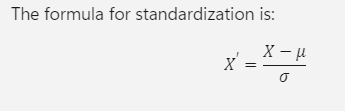

AIC      ** interperatation should be r square value should be more and aic value should low

In [ ]:
## Build model with
## HP and CC

import statsmodels.formula.api as smf
## model with hp
sml_HP = smf.ols('Price~HP+Age_08_04+KM+Doors+Gears+Quarterly_Tax+Weight', data = data_sort).fit()
print(model.rsquared,model.aic)
## feature which gives you high r squared value and less aic value should be kept


0.8637627463428191 24769.07664007625


In [ ]:
# model built with cc
sml_cc = smf.ols('Price~cc+Weight+KM+Doors+Gears+Quarterly_Tax+Age_08_04', data = data_sort).fit()
print(model.rsquared,model.aic)

0.8637627463428191 24769.07664007625


above interpretation is the of two column were the same so two of the columns are participating same for result
for the better result we can use 'ensemble methods' for better results

Residual **Analysis**

Test for normality of residual(Q-Q Plot)

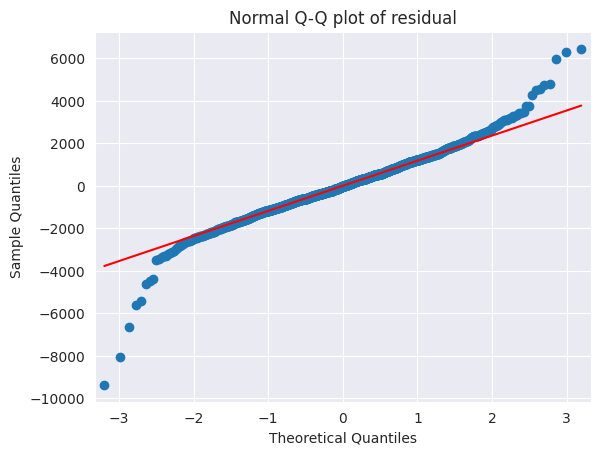

In [ ]:
import statsmodels.api as sm
sml_cc = smf.ols('Price~cc+Weight+KM+Doors+Gears+Quarterly_Tax+Age_08_04', data = data_sort).fit() ## model.resid is error
qqplot=sm.qqplot(model.resid,line='q') ## qq plot  ## when ever we write line='q' then we get 45* line
plt.title("Normal Q-Q plot of residual")  ## points that are away from line are outliers  ## matplotlib
plt.show()

In [ ]:
## to print index of values those are outliers
outliers = list(np.where(model.resid>5000))

these three values are ouliers

In [ ]:
## Residual plot for Homoscedasticity;constant variance

define function for standardization

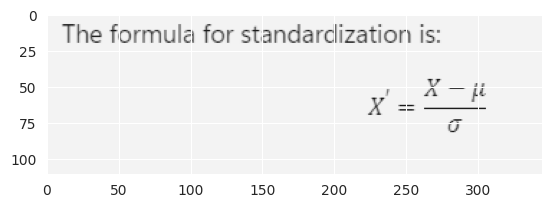

In [ ]:
# prompt: i want to upload a image  and read code

!pip install Pillow
from PIL import Image
import matplotlib.pyplot as plt

# Read the image
image = Image.open("/content/Screenshot 2024-02-07 093304.png")

# Display the image
plt.imshow(image)
plt.show()


In [ ]:
outliers

[array([109, 147, 523])]

Residual plot for Homoscedasticity : constant variance

In [ ]:
# its a type of graph

In [ ]:
## function defination for dtandardization i.e z score, function name : get_standardized_values
## z-score for standardization
## normalization is called min max sacaling

def get_stanradized_values( data_sort ):
  return (data_sort - data_sort.mean())/data_sort.std()    ## this is z score = (xi - mean)/std.dev

## xi = every point - mean divided by(/) standard deviation

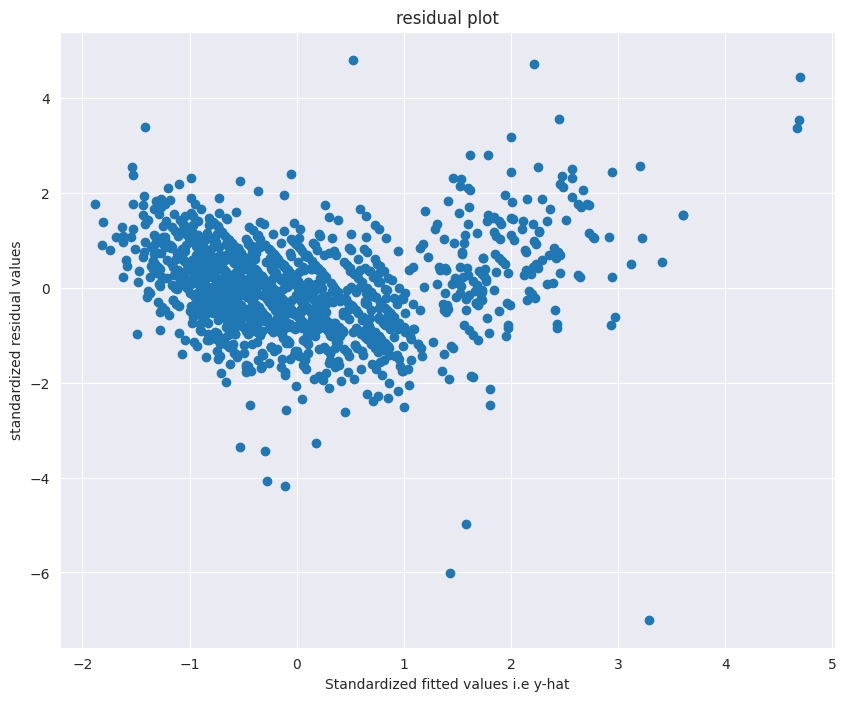

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(get_stanradized_values(model.fittedvalues),   ## fitted value is y hat, model.resid is error
            get_stanradized_values(model.resid))  ## error vs fitted values

plt.title('residual plot')
plt.xlabel('Standardized fitted values i.e y-hat')
plt.ylabel('standardized residual values')
plt.show()

**Residual vs Regressor**

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
# Check if the model variable is defined
if not 'model' in globals():
    raise ValueError("The 'model' variable is not defined.")

In [ ]:
data_sort.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
get_stanradized_values

<function __main__.get_stanradized_values(data_sort)>

In [ ]:
data_sort

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


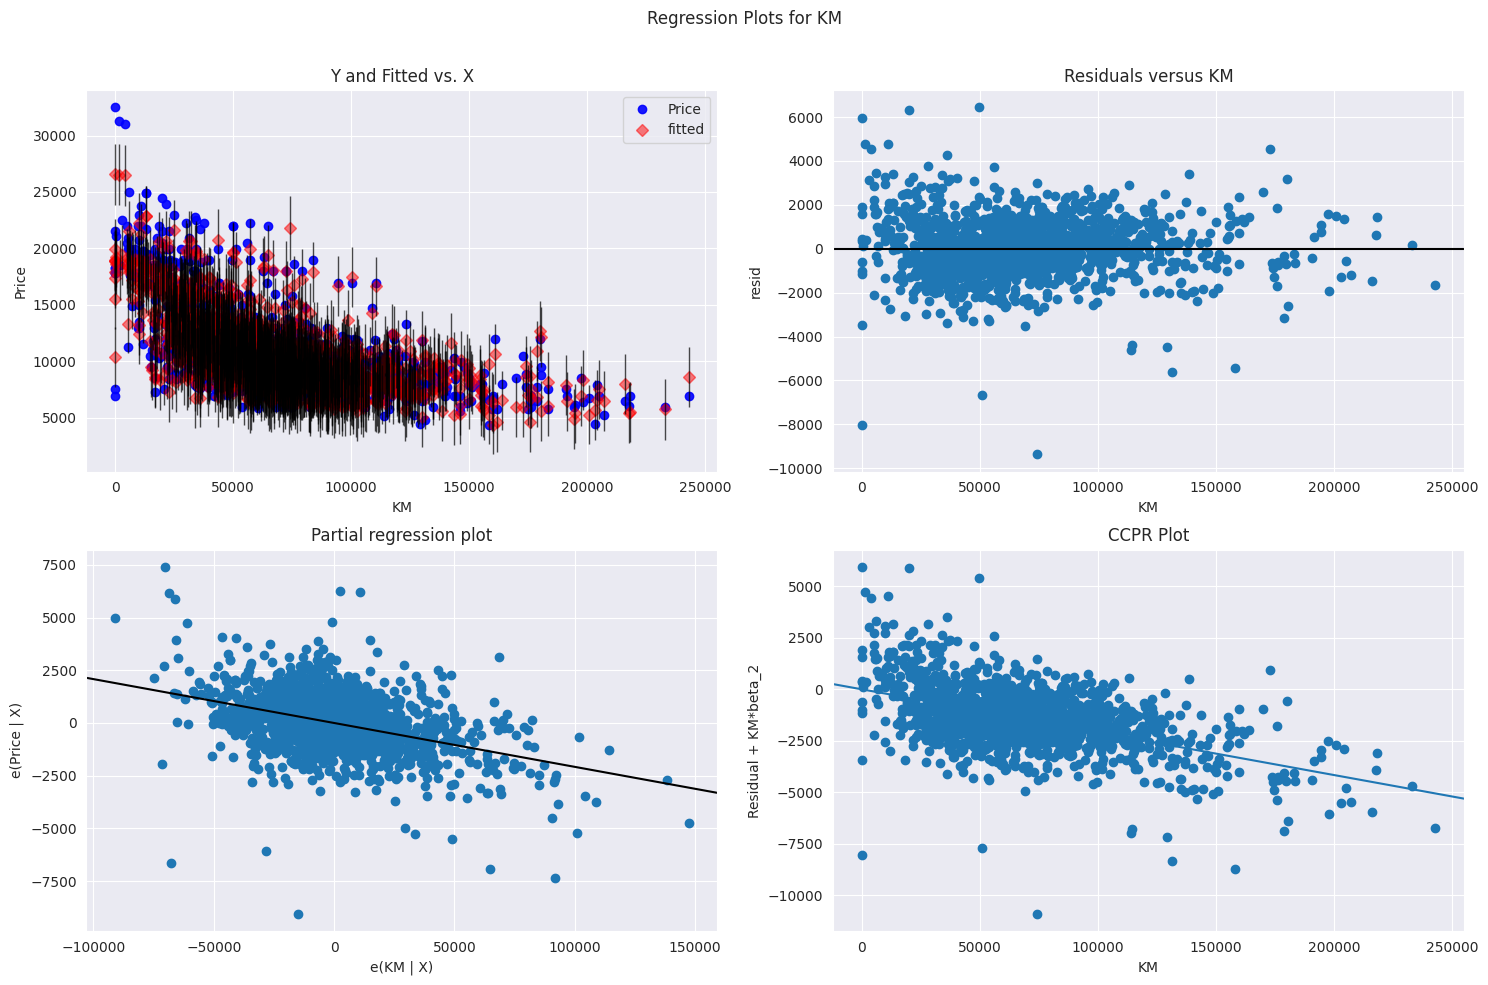

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"KM",  fig=fig)
plt.show()

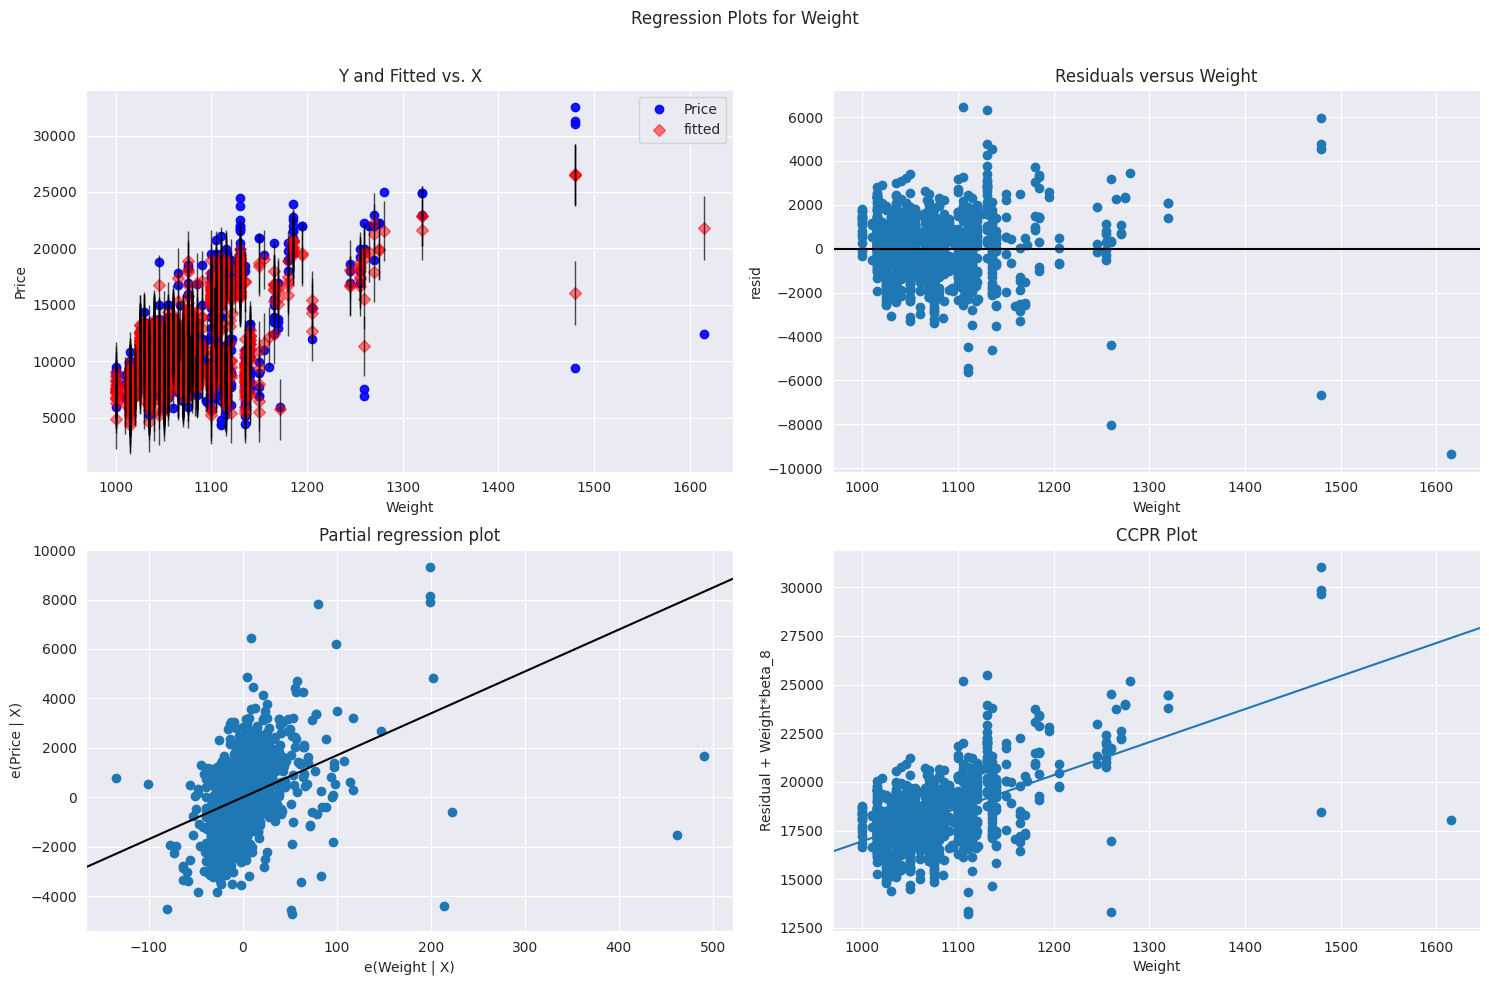

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"Weight",  fig=fig)
plt.show()

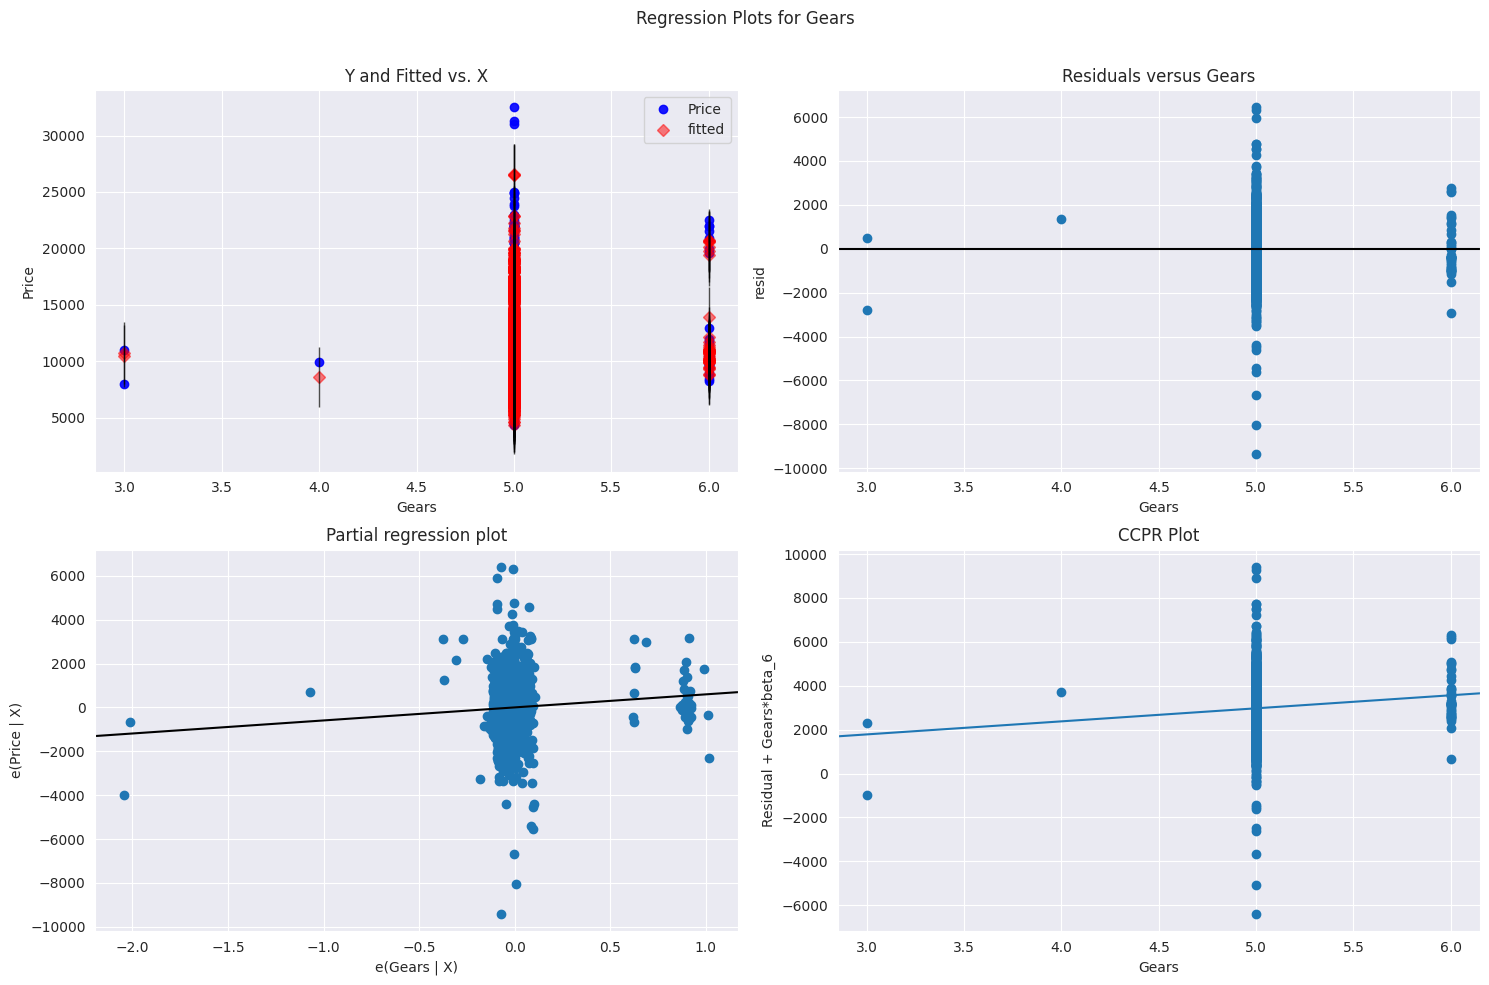

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"Gears",  fig=fig)
plt.show()

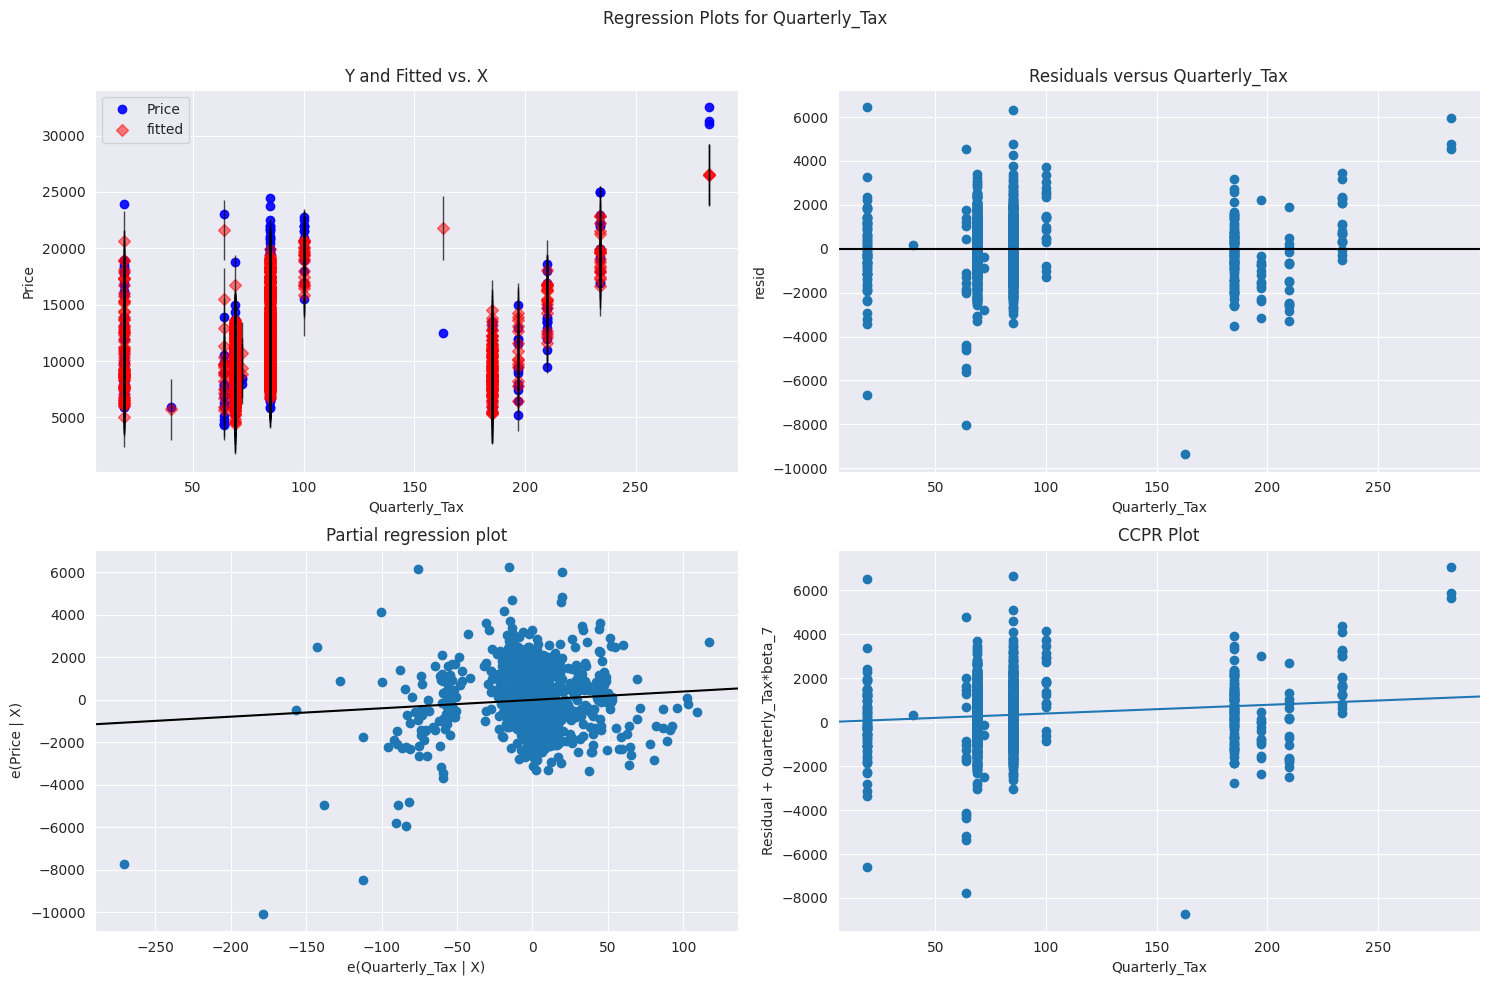

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"Quarterly_Tax",  fig=fig)
plt.show()

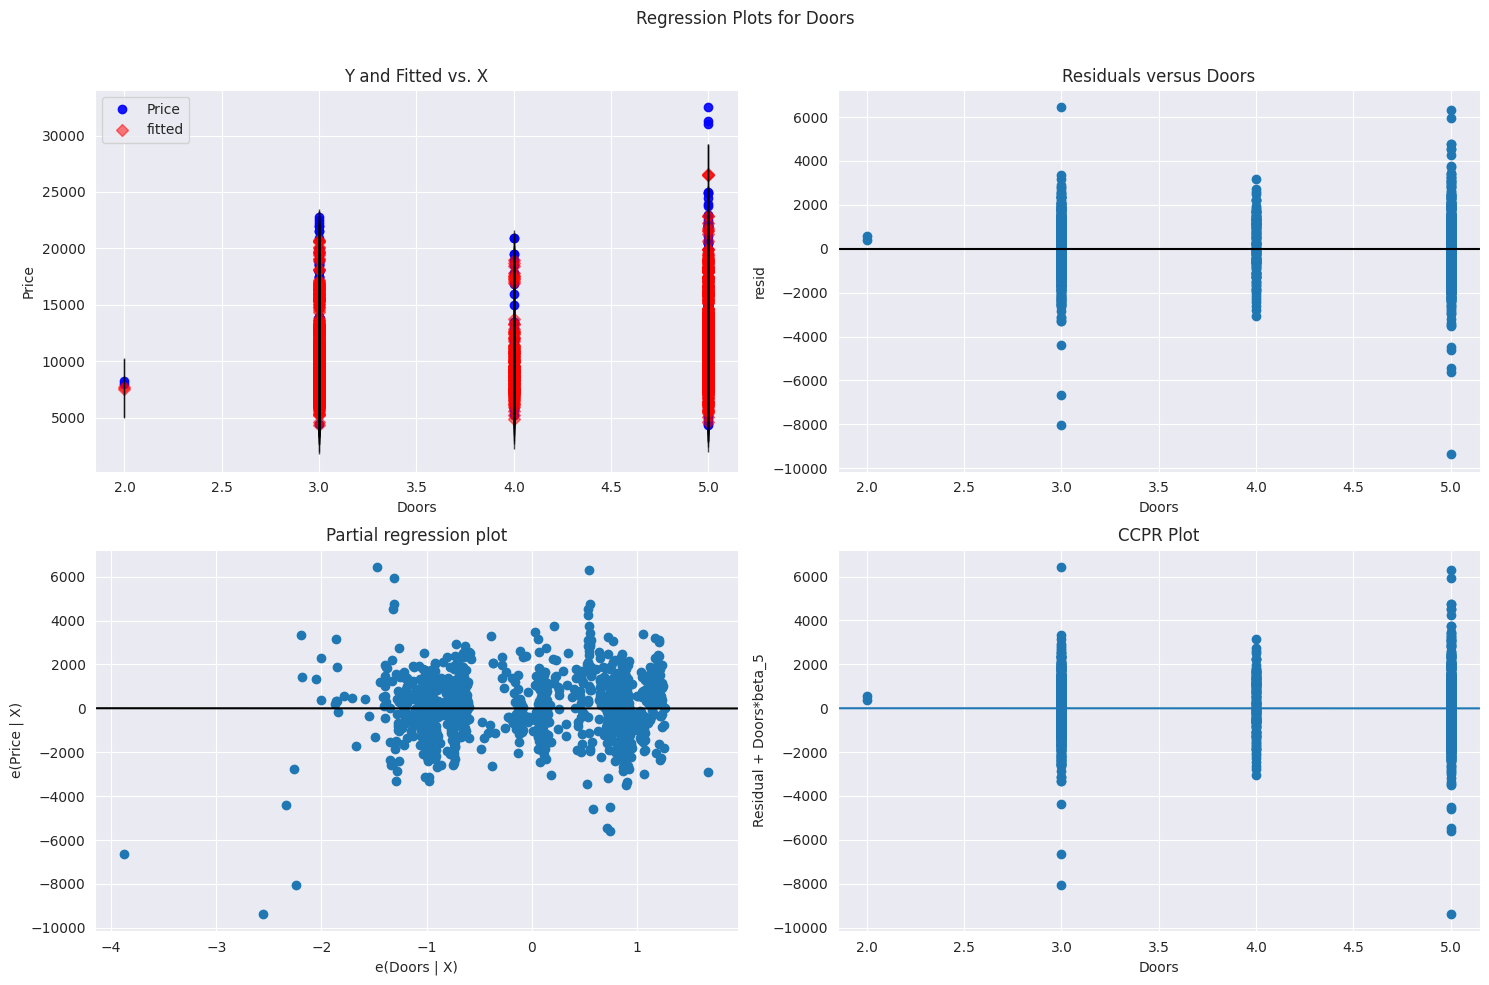

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"Doors",  fig=fig)
plt.show()

Model Deletion Diagnostics

Detecting Influencers or outliers

## for this we are going to use **C**OOK'S **D**ISTANCE

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
## this code for cooks distance
model_influence = model.get_influence()  ## this method will return 2 values : cooks distance and p value   ## ''we have called''  get-influnce method
(c,_) = model_influence.cooks_distance ## we dont need( C ' is cooks distance value') p value so we placed_here. that is temporary place holder (- for skip the value)
## identify the outliers - remove the data points angain this again and again till - until dont get any outliers
## to identify the outliers there are two methods cooks distance and leverage point
## it will take all the columns
## 'get_influnce method' - this will return cooks distance and p value


In [ ]:
data_sort.shape

(1436, 9)

In [ ]:
len(data_sort)

1436

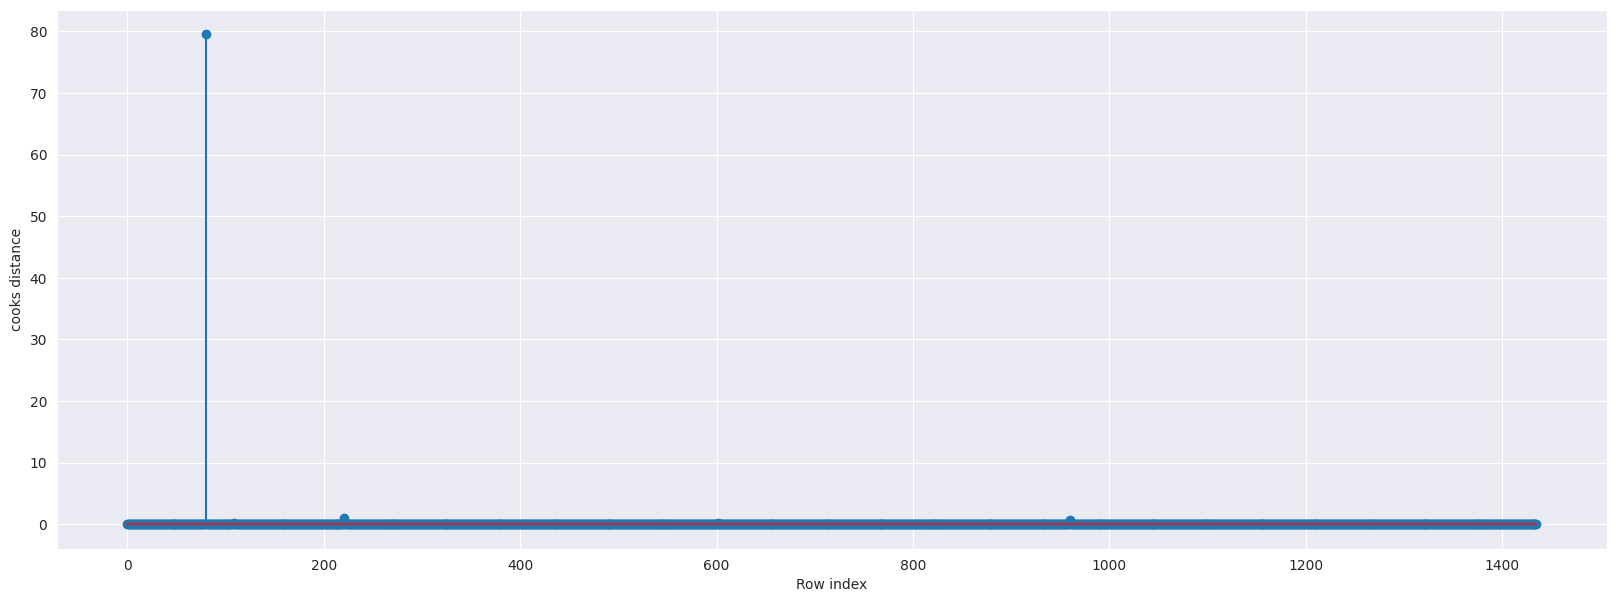

In [ ]:
## plot the influencers values using stem plot

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data_sort)), np.round(c, 3))  ## index values of columns x axis
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

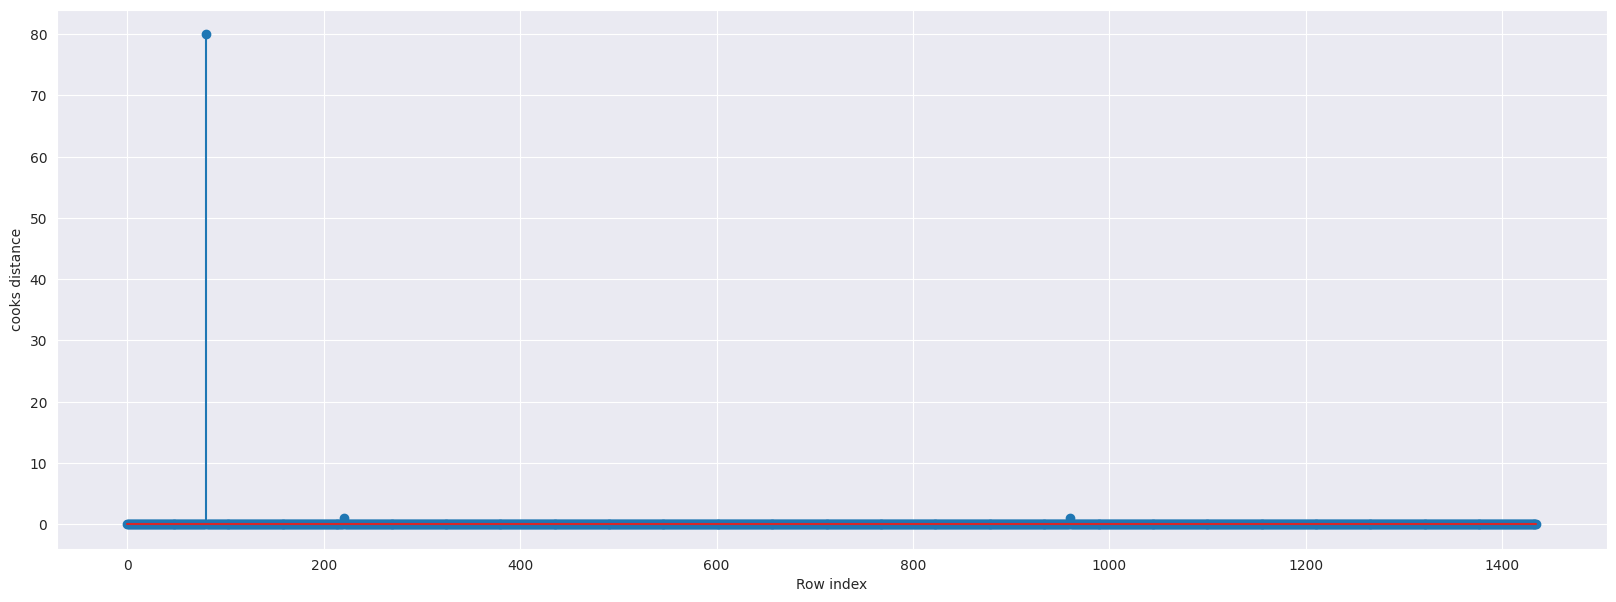

In [ ]:
## plot the influencers values using stem plot

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data_sort)), np.round(c))  ## index values of columns x axis
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [ ]:
## index and value of influncers where c is more than 1.
## the cooks distance is considred high if it is greater than 0.5 and extreme if it greater than 1.
(np.argmax(c),np.max(c))  ## argmax() gives index values of max value in data set
##  80 point is having high cooks distance  so this is so extreme value

(80, 79.52010624141815)

## High influence points

In [ ]:
data_sort.shape

(1436, 9)

In [ ]:
data_sort.shape[1]

9

In [ ]:
data_sort.shape[0]

1436

In [ ]:
## find out what is maximun of c

In [ ]:
## leverage method
k = data_sort.shape[1]   ##k is number of variables
n = data_sort.shape[0]     ## total number of data points
leverage_cutoff = 3*(k + 1)/n
leverage_cutoff

0.020891364902506964

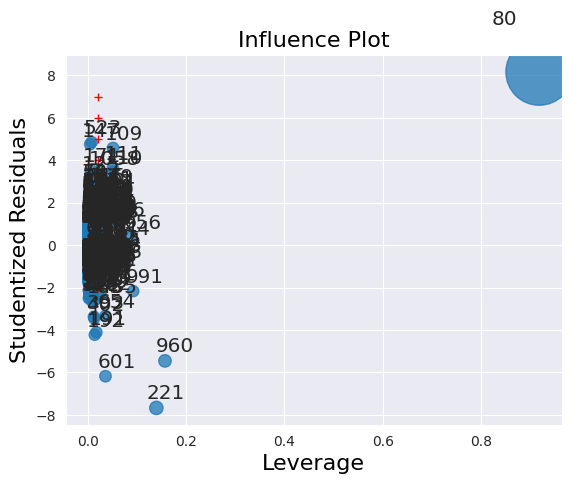

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

import matplotlib.pyplot as plt

influence_plot(model, alpha=0.5)
y=[i for i in range(-2, 8)] ## -2 to 8:10 values for printing + in red color  ## it is a list[] ## list comprehension  ## i is iteration -starts from -2 to 7
x=[leverage_cutoff for i in range(10)]  ## 10 values for printing + in red color  ## same number of elements should be there
plt.plot(x,y, 'r+')  ## from matplot lib ## r+ for + sign to print

plt.show()

In [ ]:
## find the index numbers and their details
data_sort[data_sort.index.isin([80,960,221,601])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180
221,12450,44,74172,110,1600,5,5,163,1615
601,7500,50,1,90,2000,3,5,64,1260
960,9390,66,50806,86,1300,3,5,19,1480


In [ ]:
data_sort.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
new_data = pd.read_csv('/content/utf-8-toyots.csv')

In [ ]:
print(new_data.columns)

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')


In [ ]:
new_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
## 109, 147, 523

In [ ]:
data1 = new_data.drop(new_data.index[[80,109,147,221,523,601,960]], axis=0).reset_index()

In [ ]:
data1.shape

(1429, 39)

In [ ]:
data1.head()

,index,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,...,1,1,1,0,0,0,1,0,0,0
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,...,1,0,1,0,0,0,1,0,0,0
2,2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,...,0,0,1,0,0,0,1,0,0,0
3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,...,0,0,1,0,0,0,1,0,0,0
4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
check_data = pd.read_csv('/content/utf-8-toyots.csv')
check_data.shape

(1436, 38)

In [ ]:
drop_index = data1.drop(['index'], axis=1 )

In [ ]:
drop_index.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
drop_index.shape

(1429, 38)

In [ ]:
drop_index

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1425,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1426,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1427,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
data_new_model = drop_index[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [ ]:
data_new_model.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
data_new_model.shape

(1429, 9)

Built A New Model

all the steps we have to again   
*** for the accuracy of the model we need to treat the outliers

In [ ]:
## I have to exclude the 'hp' or 'cc' and generate R-squared and AIC values
## this model is discarding 'cc'
final_ml = smf.ols('Price~cc+KM+Age_08_04+Doors+Gears+Quarterly_Tax+Weight', data=data_new_model).fit()


In [ ]:
final_ml.rsquared, final_ml.aic  ## comparativey little high r squared value and little low aic value

(0.876303840745568, 24452.30427543375)

In [ ]:
## this model is discarding the 'CC'
final_ml2 = smf.ols('Price~HP+KM+Age_08_04+Doors+Gears+Quarterly_Tax+Weight', data=data_new_model).fit()

In [ ]:
## we are getting high r-square and low aic value with 'HP' excluding the 'CC' column
final_ml2.rsquared, final_ml2.aic

(0.8776316996309866, 24436.88125359945)

In [ ]:
## 109, 147, 523
## sml_HP

Compairing above r-square and AIC value, model 'final_ml2' with hp has high r-square and low aic value hence we can include hp  col and discard the cc column , so multi collinearity problem would be resolved

In [ ]:
model_influence = final_ml2.get_influence()
(c, _) = model_influence.cooks_distance
## find again if any data point has high influence or ouliers

Text(0, 0.5, 'cooks distance')

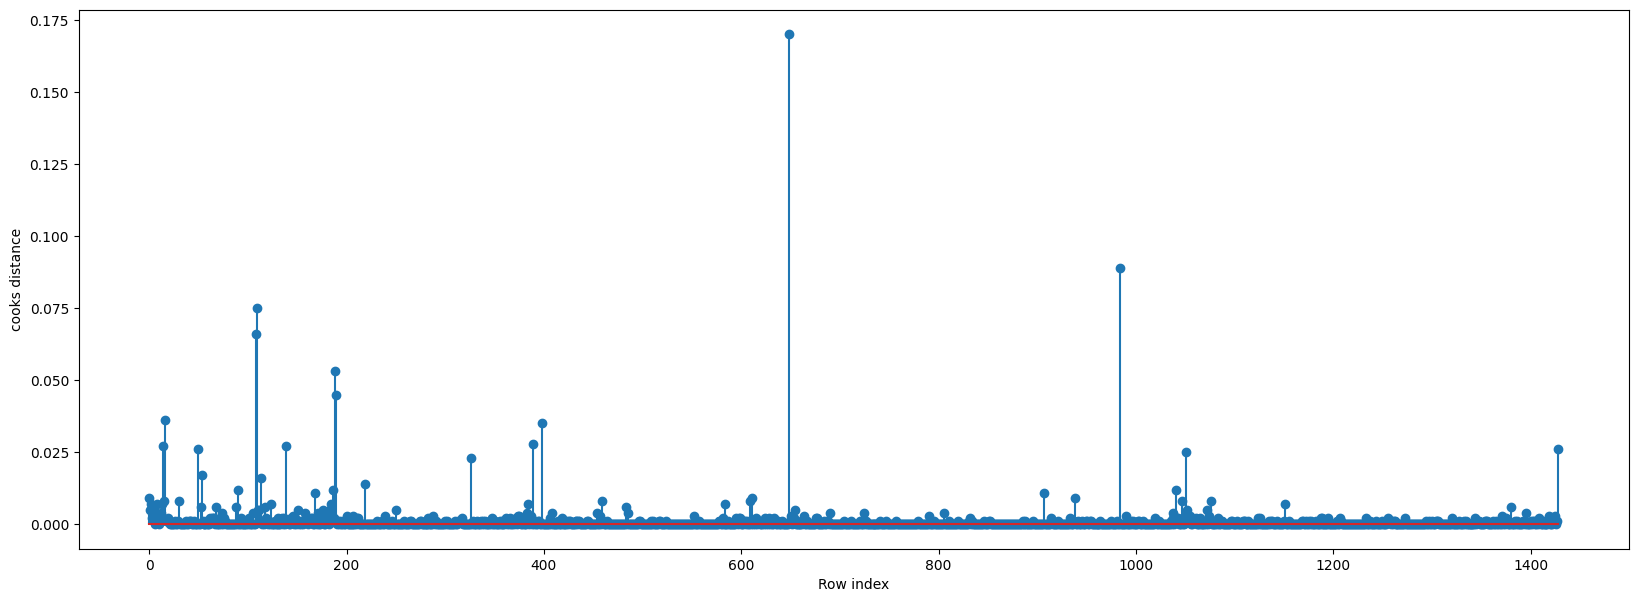

In [ ]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_new_model)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')

In [ ]:
## check index of the data points where c is more than 0.5
(np.argmax(c), np.max(c))

(648, 0.16977832392277803)

In [ ]:
## drop 648 observation
data_2nd = data_new_model.drop(data_new_model.index[[648]],axis=0)

In [ ]:
data_2nd.shape

(1428, 9)

In [ ]:
## no index had come
data_2nd.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
## this model is discarding the 'CC'
final_ml3 = smf.ols('Price~HP+KM+Age_08_04+Doors+Gears+Quarterly_Tax+Weight', data=data_2nd).fit()

In [ ]:
## we are getting high r-square and low aic value with 'HP' excluding the 'CC' column
final_ml3.rsquared, final_ml3.aic

(0.87964414545561, 24396.000627534926)

In [ ]:
model_influence2 = final_ml3.get_influence()
(c, _) = model_influence2.cooks_distance
## find again if any data point has high influence or ouliers

Text(0, 0.5, 'cooks distance')

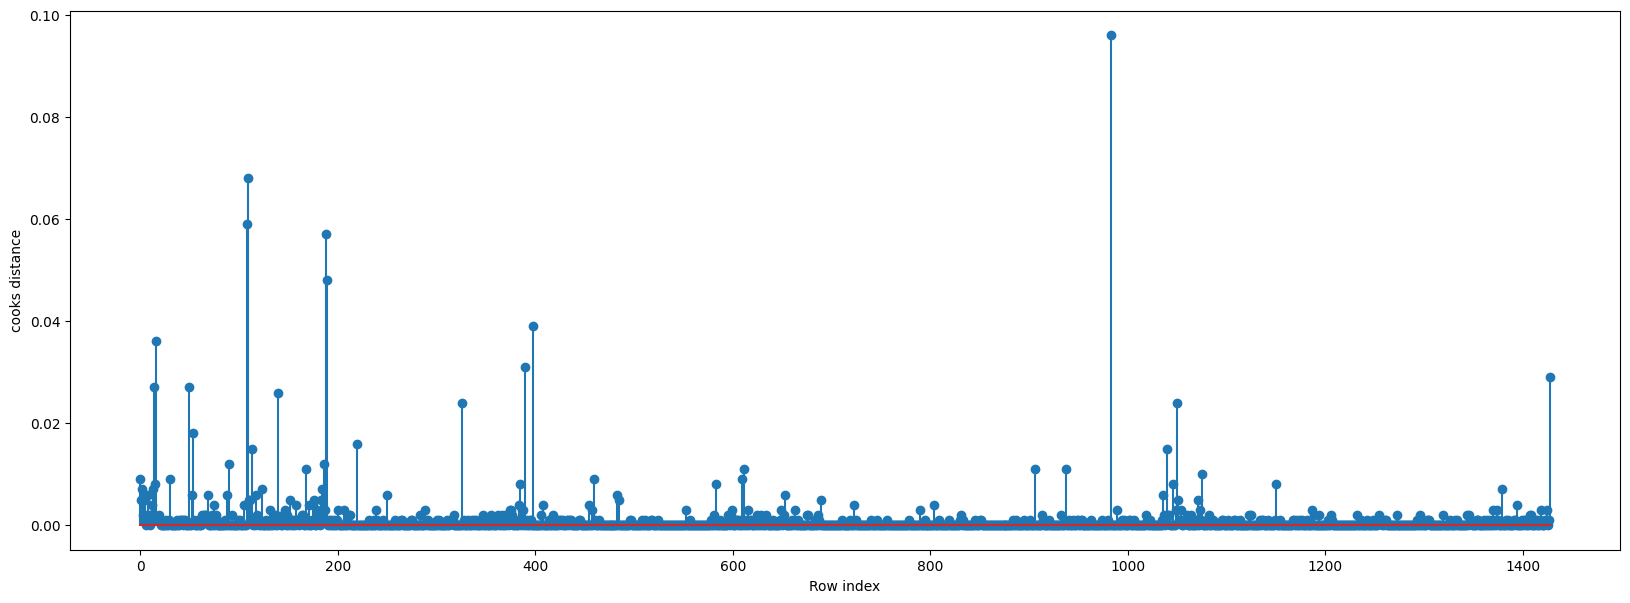

In [ ]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_2nd)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')

In [ ]:
## check index of the data points where c is more than 0.5
(np.argmax(c), np.max(c))

(983, 0.09569291002897394)

the above value coming under 0.1 so we are not doing any thing with them  beacuse the value is < 1

In [ ]:
## check the accurecy of the model
final_ml3 = smf.ols('Price~HP+KM+Age_08_04+Doors+Gears+Quarterly_Tax+Weight', data=data_2nd).fit()

In [ ]:
## first 0.8637 was our accurecy now we are having 0.8796
 (final_ml3.rsquared, final_ml3.aic)

(0.87964414545561, 24396.000627534926)

In [ ]:
data_2nd.tail()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1424,7500,69,20544,86,1300,3,5,69,1025
1425,10845,72,19000,86,1300,3,5,69,1015
1426,8500,71,17016,86,1300,3,5,69,1015
1427,7250,70,16916,86,1300,3,5,69,1015
1428,6950,76,1,110,1600,5,5,19,1114


**S**o **w**e **c**an **n**ow **m**ake **p**redction **m**odel

*Predicting for new data*

In [ ]:
## new data for predction - what will be the price ?
new_df = pd.DataFrame({'Age_08_04':78, 'KM':1000, 'HP':120, 'Doors':5, 'Gears':5, 'Quarterly_Tax':20, 'Weight':1200}, index=["index 1"])

In [ ]:
new_df

,Age_08_04,KM,HP,Doors,Gears,Quarterly_Tax,Weight
index 1,78,1000,120,5,5,20,1200


In [ ]:
final_ml3.predict(new_df)

index 1    13419.699144
dtype: float64